## Algoritmos GA y SA juntos.

## Algoritmo GA

Distancia total obtenida por el GA: 8926.971162118665


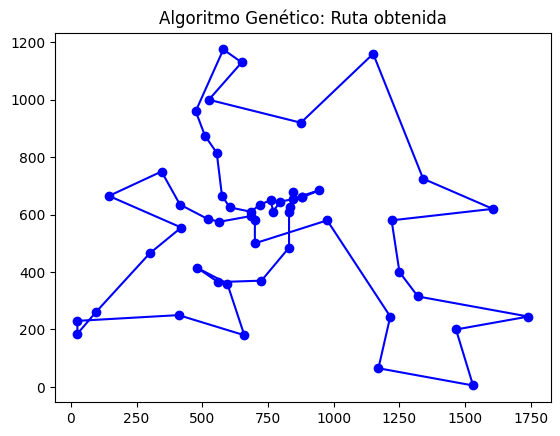

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# funciín para leer el archivo TSP y generar la matriz de distancias
def read_tsp_file(file_name):
    coordinates = []
    with open(file_name, 'r') as file:
        lines = file.readlines()
        in_coordinates = False
        for line in lines:
            line = line.strip()
            if line.startswith("NODE_COORD_SECTION"):
                in_coordinates = True
                continue
            if line.startswith("EOF"):
                break
            if in_coordinates:
                parts = line.split()
                if len(parts) == 3:
                    x, y = float(parts[1]), float(parts[2])
                    coordinates.append((x, y))
    return coordinates

# creamos la matriz de distancias entre todas las ciudades
def create_distance_matrix(coordinates):
    num_cities = len(coordinates)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                distance_matrix[i][j] = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 + 
                                                (coordinates[i][1] - coordinates[j][1])**2)
    return distance_matrix

# calculamos la distancia total de una ruta
def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i + 1]]
    total_distance += distance_matrix[route[-1]][route[0]]  # Volver al inicio
    return total_distance

# genera una población inicial de rutas aleatorias
def generate_initial_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        route = list(range(num_cities))
        random.shuffle(route)
        population.append(route)
    return population

# selección de padres
def select_parents(population, distance_matrix):
    selected_parents = random.sample(population, 2)
    fitness = [calculate_total_distance(parent, distance_matrix) for parent in selected_parents]
    return selected_parents[fitness.index(min(fitness))]

# cruce de dos padres
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[start:end] = parent1[start:end]
    current_pos = end
    for city in parent2:
        if city not in child:
            if current_pos == len(parent1):
                current_pos = 0
            child[current_pos] = city
            current_pos += 1
    return child

# mutación
def mutate(route):
    i, j = random.sample(range(len(route)), 2)
    route[i], route[j] = route[j], route[i]
    return route

# Algoritmo GA
def genetic_algorithm(distance_matrix, population_size=100, generations=500, mutation_rate=0.05):
    num_cities = len(distance_matrix)
    population = generate_initial_population(population_size, num_cities)
    for _ in range(generations):
        population.sort(key=lambda route: calculate_total_distance(route, distance_matrix))
        next_generation = population[:int(population_size / 2)]
        while len(next_generation) < population_size:
            parent1 = select_parents(population, distance_matrix)
            parent2 = select_parents(population, distance_matrix)
            child = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child = mutate(child)
            next_generation.append(child)
        population = next_generation
    return min(population, key=lambda route: calculate_total_distance(route, distance_matrix))

# visualizamos ruta
def visualize_route(route, coordinates):
    route_coordinates = [coordinates[i] for i in route + [route[0]]]
    route_coordinates = np.array(route_coordinates)
    plt.plot(route_coordinates[:, 0], route_coordinates[:, 1], marker='o', linestyle='-', color='b')
    plt.title("Algoritmo Genético: Ruta obtenida")
    plt.show()

def main():
    coordinates = read_tsp_file("berlin52.tsp")
    distance_matrix = create_distance_matrix(coordinates)
    best_route = genetic_algorithm(distance_matrix)
    best_distance = calculate_total_distance(best_route, distance_matrix)
    print(f"Distancia total obtenida por el GA: {best_distance}")
    visualize_route(best_route, coordinates)

if __name__ == "__main__":
    main()


## Algoritmo SA

Distancia total obtenida por el SA: 12979.881949324252


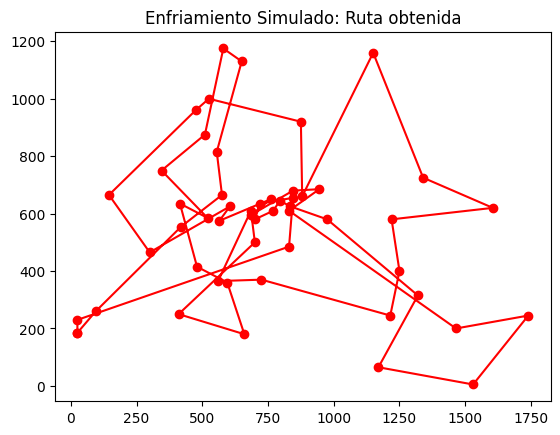

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# función para leer el archivo TSP y generar la matriz de distancias
def read_tsp_file(file_name):
    coordinates = []
    with open(file_name, 'r') as file:
        lines = file.readlines()
        in_coordinates = False
        for line in lines:
            line = line.strip()
            if line.startswith("NODE_COORD_SECTION"):
                in_coordinates = True
                continue
            if line.startswith("EOF"):
                break
            if in_coordinates:
                parts = line.split()
                if len(parts) == 3:
                    x, y = float(parts[1]), float(parts[2])
                    coordinates.append((x, y))
    return coordinates

# creamos la matriz de distancias entre todas las ciudades
def create_distance_matrix(coordinates):
    num_cities = len(coordinates)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                distance_matrix[i][j] = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 + 
                                                (coordinates[i][1] - coordinates[j][1])**2)
    return distance_matrix

# calculamos la distancia total de una ruta
def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i + 1]]
    total_distance += distance_matrix[route[-1]][route[0]]  # Volver al inicio
    return total_distance

# Algoritmo SA
def simulated_annealing(distance_matrix, initial_temp=1000, cooling_rate=0.995, iterations=1000):
    num_cities = len(distance_matrix)
    current_route = list(range(num_cities))
    random.shuffle(current_route)
    current_distance = calculate_total_distance(current_route, distance_matrix)
    temperature = initial_temp

    for _ in range(iterations):
        new_route = current_route[:]
        i, j = random.sample(range(len(current_route)), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_distance = calculate_total_distance(new_route, distance_matrix)

        if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temperature):
            current_route = new_route
            current_distance = new_distance

        temperature *= cooling_rate

    return current_route

# visualizamos ruta
def visualize_route(route, coordinates):
    route_coordinates = [coordinates[i] for i in route + [route[0]]]
    route_coordinates = np.array(route_coordinates)
    plt.plot(route_coordinates[:, 0], route_coordinates[:, 1], marker='o', linestyle='-', color='r')
    plt.title("Enfriamiento Simulado: Ruta obtenida")
    plt.show()

def main():
    coordinates = read_tsp_file("berlin52.tsp")
    distance_matrix = create_distance_matrix(coordinates)
    best_route = simulated_annealing(distance_matrix)
    best_distance = calculate_total_distance(best_route, distance_matrix)
    print(f"Distancia total obtenida por el SA: {best_distance}")
    visualize_route(best_route, coordinates)

if __name__ == "__main__":
    main()
